In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')
data=df.to_numpy()
X=data[:,1:]
scaler = StandardScaler().fit(X)
X=scaler.transform(X)
y=data[:,0]

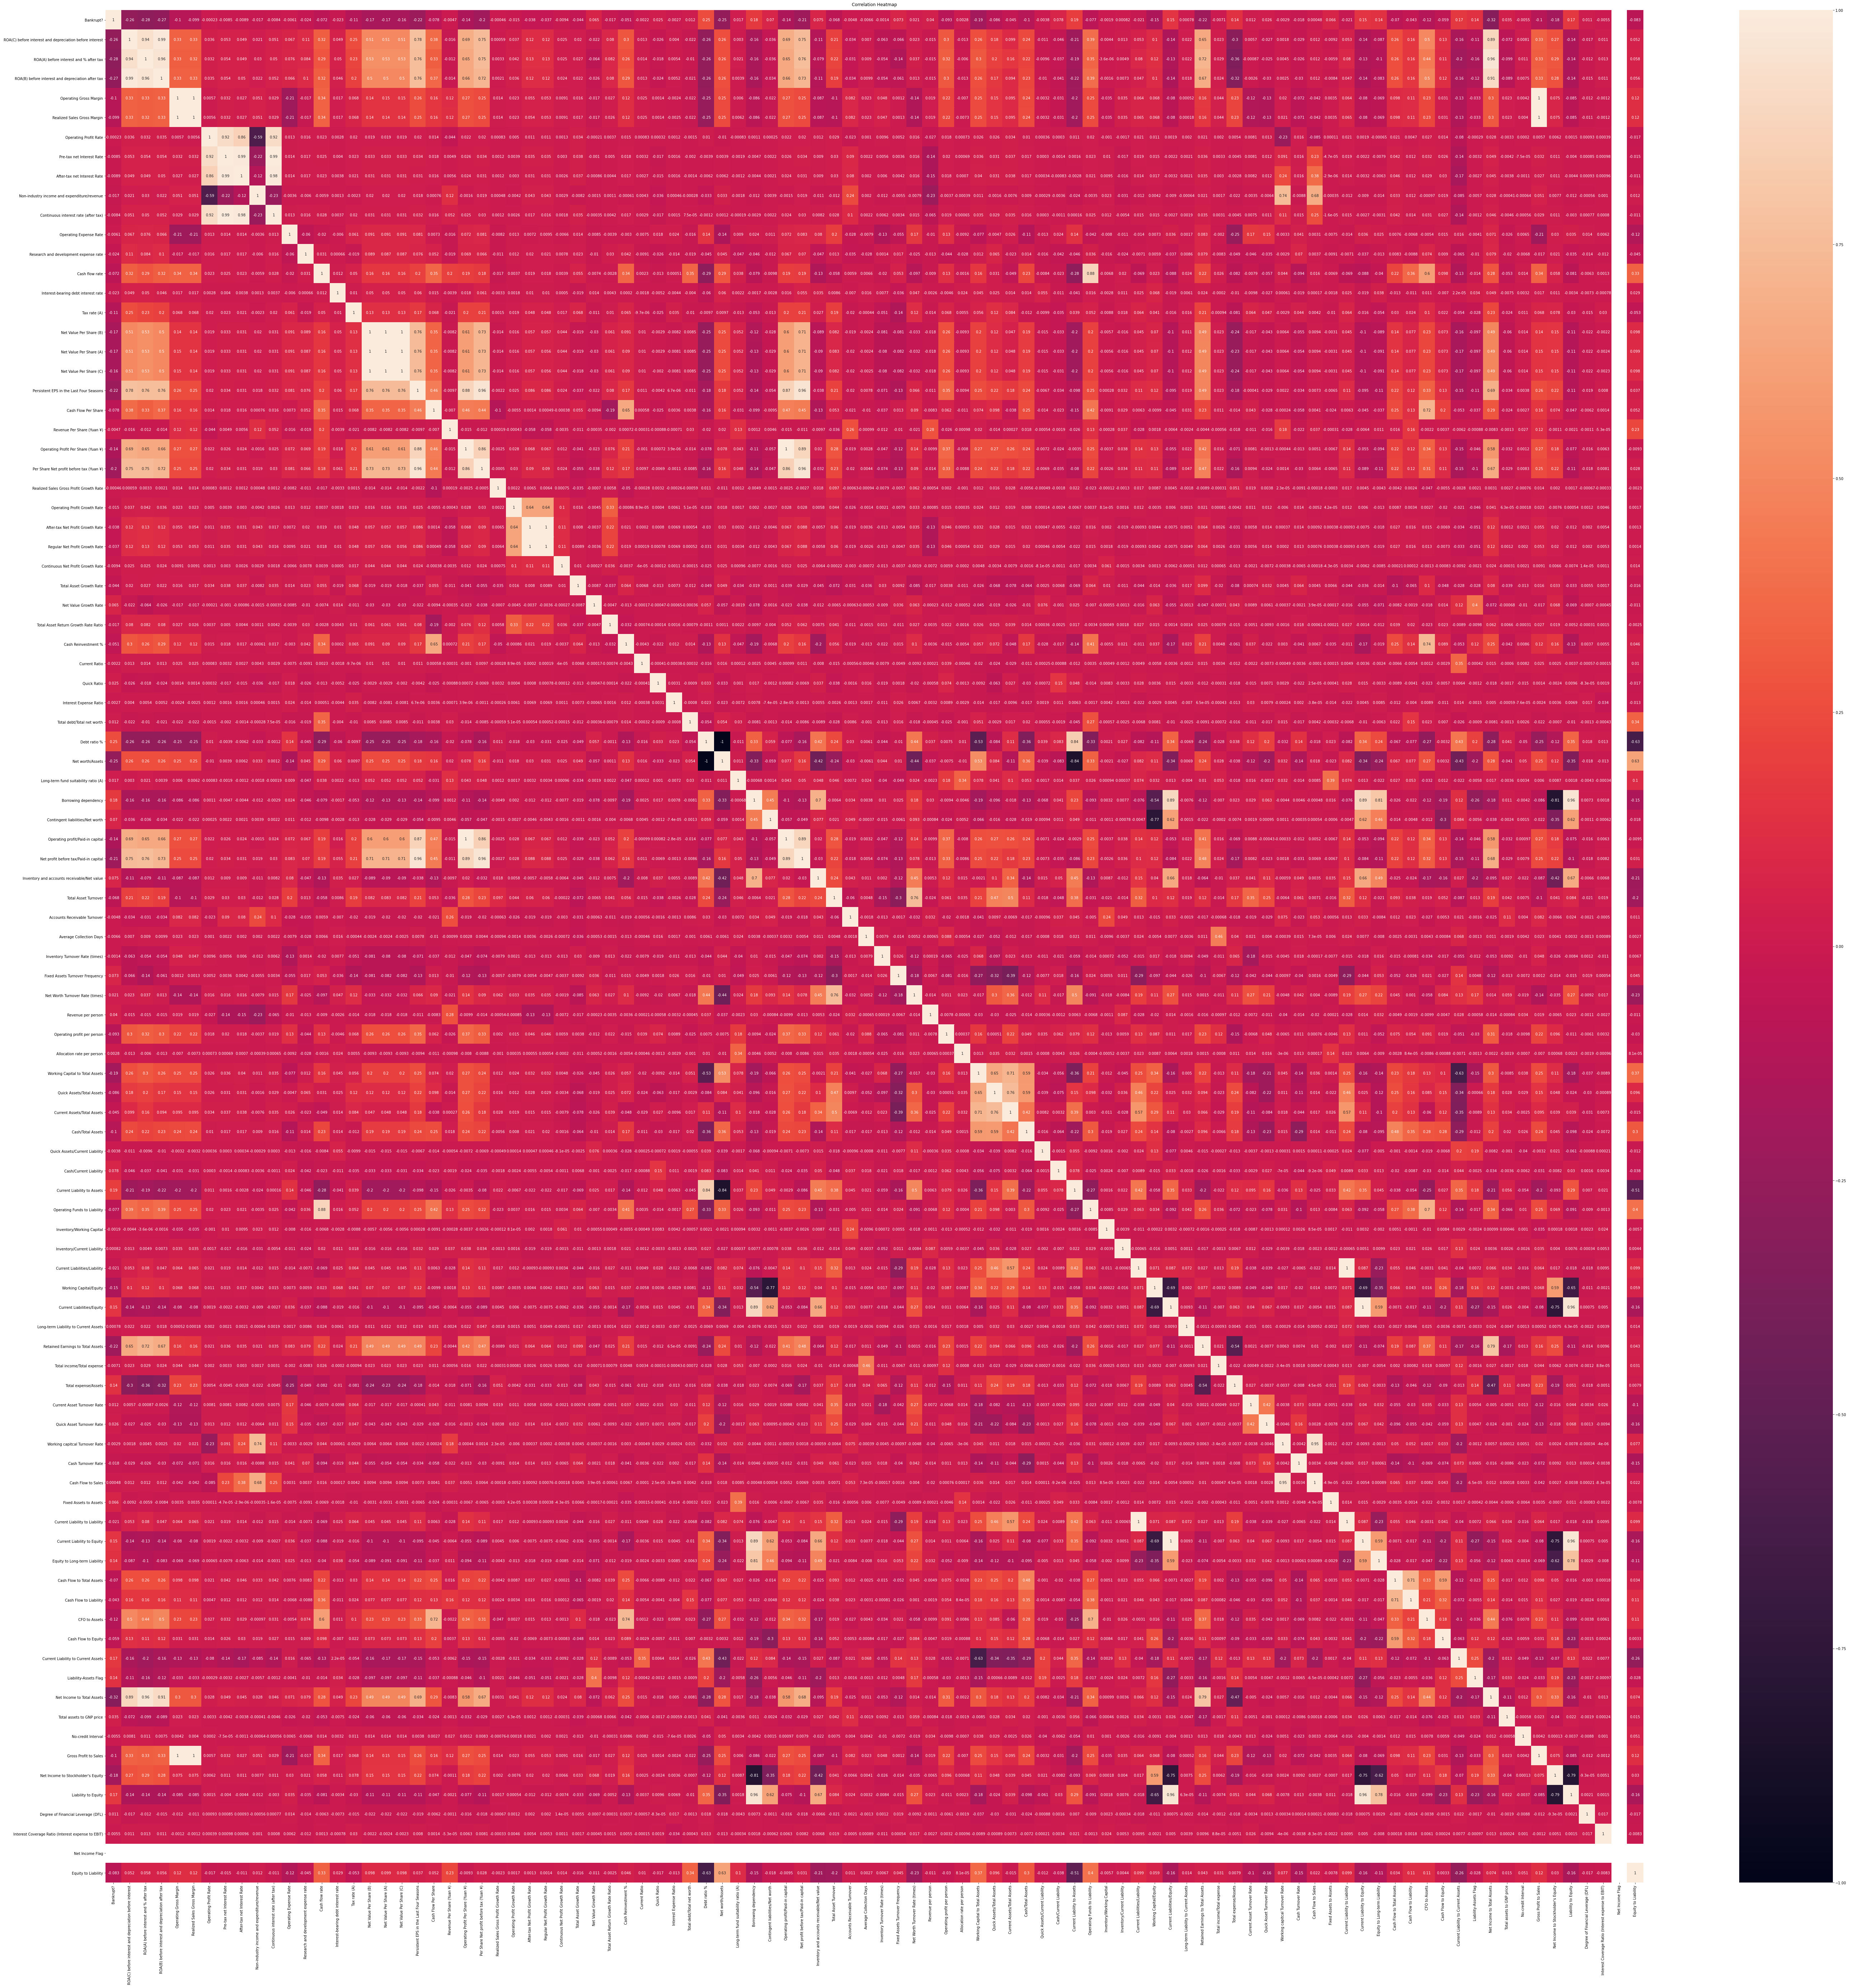

In [4]:
plt.figure(figsize=(96, 96))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [5]:
def evaluation(true,predict):
    print(metrics.classification_report(true, predict))
    print('-----------------------------------------------------')

### PCA Analysis

In [6]:
pca=PCA().fit(X)
X_pca=pca.transform(X)

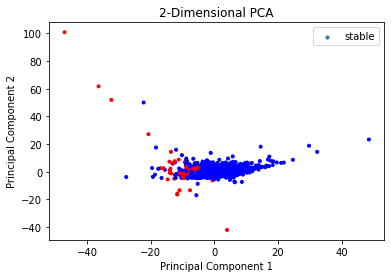

In [24]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,marker='.',cmap='bwr')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-Dimensional PCA')

In [25]:
pca.explained_variance_ratio_[0:10]

array([0.13346977, 0.07213753, 0.05036685, 0.04724484, 0.04234718,
       0.0322023 , 0.03049291, 0.02934268, 0.0280185 , 0.02156488])

Text(0.5, 1.0, 'PCA Captured Variance Ratio')

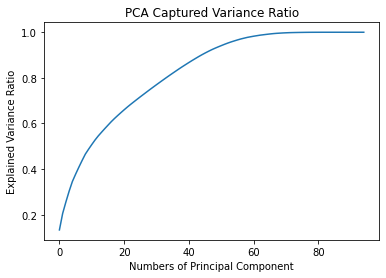

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numbers of Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Captured Variance Ratio')

In [10]:
np.cumsum(pca.explained_variance_ratio_)# Let's use the first 8

array([0.13346977, 0.2056073 , 0.25597415, 0.30321898, 0.34556616,
       0.37776846, 0.40826136, 0.43760404, 0.46562254, 0.48718742,
       0.5077789 , 0.52762515, 0.54551435, 0.56151968, 0.57729875,
       0.59263112, 0.60777561, 0.62174715, 0.63489582, 0.64763827,
       0.66011948, 0.67229452, 0.68390377, 0.69509895, 0.70620221,
       0.71719369, 0.7279494 , 0.73867954, 0.74939229, 0.75987324,
       0.77025506, 0.78052412, 0.79071373, 0.80084935, 0.81083724,
       0.82062637, 0.83031803, 0.83996893, 0.84932908, 0.8584133 ,
       0.86741662, 0.87624716, 0.88477788, 0.89323474, 0.90128168,
       0.90890894, 0.91620617, 0.92321317, 0.92959778, 0.93565499,
       0.94143438, 0.94716485, 0.9525062 , 0.95747134, 0.96197157,
       0.96635245, 0.97046766, 0.9739327 , 0.97737803, 0.98004267,
       0.98264962, 0.98494715, 0.98722874, 0.98902676, 0.99078859,
       0.99243492, 0.99393009, 0.99512635, 0.99602822, 0.99690258,
       0.99757997, 0.99815104, 0.99855045, 0.99886001, 0.99912

In [11]:
X=X_pca[:,0:46]

### Classifier Test

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,stratify=y,random_state=123)

In [14]:
def classification(X_train, X_test, y_train, y_test):
    classifiers=[MLPClassifier(activation='logistic',max_iter=1000),KNeighborsClassifier(n_neighbors=5),
             GaussianProcessClassifier(),DecisionTreeClassifier(),
             GaussianNB(),LogisticRegression(solver='newton-cg',max_iter=1000)]
    names=['MLP','KNN','GPC','CART','Naive Bays','Logit Model']
    np.random.seed(123)
    for i,clf in enumerate(classifiers):
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        print('Model=',names[i])
        evaluation(y_test,pred)

In [15]:
classification(X_train, X_test, y_train, y_test)

Model= MLP
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1320
         1.0       0.47      0.20      0.29        44

    accuracy                           0.97      1364
   macro avg       0.72      0.60      0.63      1364
weighted avg       0.96      0.97      0.96      1364

-----------------------------------------------------
Model= KNN
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1320
         1.0       0.60      0.20      0.31        44

    accuracy                           0.97      1364
   macro avg       0.79      0.60      0.64      1364
weighted avg       0.96      0.97      0.96      1364

-----------------------------------------------------
Model= GPC
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1320
         1.0       0.35      0.18      0.24        44

    accuracy                           0.

### Regularized Linear Model

In [16]:
# Import Lasso classifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score

Average F1 Score= 0.5054945054945055
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      6599
         1.0       0.35      0.49      0.41       220

    accuracy                           0.95      6819
   macro avg       0.67      0.73      0.69      6819
weighted avg       0.96      0.95      0.96      6819

-----------------------------------------------------


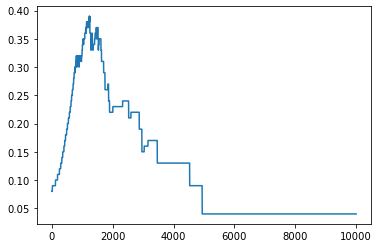

In [17]:
def threshold(Z,threshold):
    for i in range(len(Z)):
        if Z[i]>=threshold:
            Z[i]=1
        else:
            Z[i]=0
    return Z

def lasso_model(X_train, X_test, y_train, y_test):
    alphas=np.linspace(0.001,0.1,100)
    cv=KFold(n_splits=10,shuffle=True,random_state=123)
    scores=[cross_val_score(Lasso(alpha=k),X,y,cv=cv,scoring='neg_mean_squared_error').mean() for k in alphas]
    f1score=[]
    for i in range(10000):
        clf=Lasso(alpha=alphas[np.argmin(np.abs(scores))]).fit(X_train,y_train)
        Z_lasso=threshold(clf.predict(X_test),i*0.0001)
        k=round(f1_score(y_test,Z_lasso),2)
        f1score.append(k)
    plt.plot(f1score)
    tol=np.argmax(f1score)*0.0001
    return f1score,alphas[np.argmin(np.abs(scores))],tol

f1score_lasso,alpha_lasso,tol_lasso=lasso_model(X_train, X_test, y_train, y_test)

for i in range(100):
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,stratify=y,random_state=i)
    clf_lasso=Lasso(alpha=alpha_lasso).fit(X_train,y_train)
    Z_lasso=threshold(clf_lasso.predict(X_test),tol_lasso)
    f1score_1=[]
    f1score_1.append(f1_score(y_test,Z_lasso))
    
print('Average F1 Score=',np.mean(f1score_1))

Z_L=threshold(clf_lasso.predict(X),tol_lasso)
evaluation(y,Z_L)

Average F1 Score= 0.5094339622641509
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      6599
         1.0       0.32      0.55      0.40       220

    accuracy                           0.95      6819
   macro avg       0.65      0.76      0.69      6819
weighted avg       0.96      0.95      0.95      6819

-----------------------------------------------------


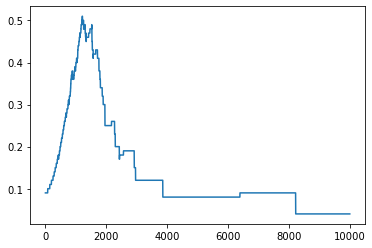

In [18]:
from sklearn.linear_model import Ridge
def ridge_model(X_train, X_test, y_train, y_test):
    alphas=np.linspace(0.001,0.1,100)
    cv=KFold(n_splits=10,shuffle=True,random_state=123)
    scores=[cross_val_score(Ridge(alpha=k),X,y,cv=cv,scoring='neg_mean_squared_error').mean() for k in alphas]
    f1score=[]
    for i in range(10000):
        clf=Ridge(alpha=alphas[np.argmin(np.abs(scores))]).fit(X_train,y_train)
        Z_Ridge=threshold(clf.predict(X_test),i*0.0001)
        k=round(f1_score(y_test,Z_Ridge),2)
        f1score.append(k)
    plt.plot(f1score)
    tol=np.argmax(f1score)*0.0001
    return f1score,alphas[np.argmin(np.abs(scores))],tol

f1score_ridge,alpha_ridge,tol_ridge=ridge_model(X_train, X_test, y_train, y_test)

for i in range(100):
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,stratify=y,random_state=i)
    clf_ridge=Ridge(alpha=alpha_ridge).fit(X_train,y_train)
    Z_Ridge=threshold(clf_ridge.predict(X_test),tol_ridge)
    f1score_2=[]
    f1score_2.append(f1_score(y_test,Z_Ridge))
print('Average F1 Score=',np.mean(f1score_2))

Z_R=threshold(clf_ridge.predict(X),tol_ridge)
evaluation(y,Z_R)

Average F1 Score= 0.5161290322580645
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      6599
         1.0       0.35      0.51      0.41       220

    accuracy                           0.95      6819
   macro avg       0.66      0.74      0.69      6819
weighted avg       0.96      0.95      0.96      6819

-----------------------------------------------------


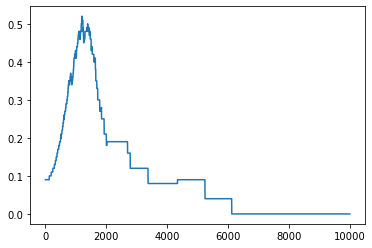

In [19]:
from sklearn.linear_model import ElasticNet
def ElasticNet_model(X_train, X_test, y_train, y_test):
    alphas=np.linspace(0.001,0.1,100)
    cv=KFold(n_splits=10,shuffle=True,random_state=123)
    scores=[cross_val_score(ElasticNet(alpha=k),X,y,cv=cv,scoring='neg_mean_squared_error').mean() for k in alphas]
    f1score=[]
    for i in range(10000):
        clf=ElasticNet(alpha=alphas[np.argmin(np.abs(scores))]).fit(X_train,y_train)
        Z_ElasticNet=threshold(clf.predict(X_test),i*0.0001)
        k=round(f1_score(y_test,Z_ElasticNet),2)
        f1score.append(k)
    plt.plot(f1score)
    tol=np.argmax(f1score)*0.0001
    return f1score,alphas[np.argmin(np.abs(scores))],tol

f1score_EN,alpha_EN,tol_EN=ElasticNet_model(X_train, X_test, y_train, y_test)
for i in range(100):
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,stratify=y,random_state=i)
    clf_EN=ElasticNet(alpha=alpha_EN).fit(X_train,y_train)
    Z_ElasticNet=threshold(clf_EN.predict(X_test),tol_EN)
    f1score_3=[]
    f1score_3.append(f1_score(y_test,Z_ElasticNet))
print('Average F1 Score=',np.mean(f1score_3))

Z_EN=threshold(clf_EN.predict(X),tol_EN)
evaluation(y,Z_EN)